In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/anime.csv
/kaggle/input/anime-recommendations-database/rating.csv


In [2]:
import numpy as np
import pandas as pd


In [3]:
anime_data = pd.read_csv('../input/anime-recommendations-database/anime.csv')
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating_data = pd.read_csv('../input/anime-recommendations-database/rating.csv')
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [11]:
# join the user_id with the anime_data using anime_id, then drop rating from the rating table
rating_data = rating_data.drop(['rating'], axis = 1)
all_data = pd.merge(anime_data, rating_data, on='anime_id')
all_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278


In [12]:
# getting shape 
all_data.shape

(7813727, 8)

In [15]:
all_data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
user_id       int64
dtype: object

In [16]:
print(all_data.describe().to_markdown())

|       |        anime_id |      rating |          members |         user_id |
|:------|----------------:|------------:|-----------------:|----------------:|
| count |     7.81373e+06 | 7.81372e+06 |      7.81373e+06 |     7.81373e+06 |
| mean  |  8909.05        | 7.65313     | 178621           | 36728           |
| std   |  8883.92        | 0.673029    | 188176           | 20998           |
| min   |     1           | 1.67        |     29           |     1           |
| 25%   |  1240           | 7.27        |  44030           | 18974           |
| 50%   |  6213           | 7.68        | 110470           | 36791           |
| 75%   | 14093           | 8.13        | 244268           | 54757           |
| max   | 34519           | 9.5         |      1.01392e+06 | 73516           |


In [17]:
# how much is the missing data

print(all_data.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| anime_id |   0 |
| name     |   0 |
| genre    | 110 |
| type     |   4 |
| episodes |   0 |
| rating   |   6 |
| members  |   0 |
| user_id  |   0 |


In [18]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(all_data.rating.min()))
print('Maximum rating is: %d' %(all_data.rating.max()))

Minimum rating is: 1
Maximum rating is: 9


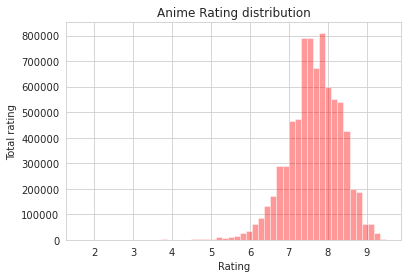

In [19]:
# Check the distribution of the rating
import seaborn as sns

with sns.axes_style('white'):
    g = sns.set_style('whitegrid') 
    g = sns.distplot(all_data['rating'], kde = False, color ='red', bins = 50)
    g.set(xlabel='Rating', ylabel='Total rating', title = 'Anime Rating distribution')

In [23]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",all_data.shape[0])
print("Total No of Users   :", len(np.unique(all_data.user_id)))
print("Total No of anime movies  :", len(np.unique(all_data.anime_id)))


Total data 
--------------------------------------------------

Total no of ratings : 7813727
Total No of Users   : 73515
Total No of anime movies  : 11197


In [ ]:
#Analysis of rating given by the user 

no_of_rated_anime_per_user = all_data.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_anime_per_user.head()